In [1]:
!pip install ethicml==0.2.2 -q

     |████████████████████████████████| 37.5 MB 64 kB/s 
     |████████████████████████████████| 181 kB 44.4 MB/s 
     |████████████████████████████████| 3.9 MB 38.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 2.1 MB 41.9 MB/s 
     |████████████████████████████████| 8.8 MB 42.5 MB/s 
     |████████████████████████████████| 461 kB 58.5 MB/s 


# TASK 1 (STANDARD MODEL - CRIME DATASET)
###Using LOGSTIC REGRESSION

In [2]:
# Task 1 reworking with ethhicml
import ethicml as em
import json 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = em.crime(split="Race-Binary").load()
train, test = em.train_test_split(data)
C_arr = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
hyperparams = {"C": C_arr}

In [4]:
data.x.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,state_46,state_47,state_48,state_49,state_50,state_51,state_53,state_54,state_55,state_56
0,0.01,0.58,0.34,0.58,0.36,0.39,0.02,1.0,0.45,0.70,...,0,0,0,0,0,0,0,0,0,0
1,0.06,0.34,0.40,0.46,0.28,0.38,0.08,1.0,0.27,0.60,...,0,0,0,0,0,0,0,0,0,1
2,0.05,0.35,0.38,0.51,0.33,0.41,0.07,1.0,0.23,0.59,...,0,0,0,0,0,0,0,0,0,0
3,0.01,0.89,0.52,0.56,0.40,0.34,0.02,1.0,0.41,0.60,...,0,0,0,0,0,0,0,0,0,0
4,0.12,0.44,0.90,0.91,0.92,0.28,0.13,1.0,0.16,0.63,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.x.shape

(1993, 136)

In [6]:
data.x.columns

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage',
       ...
       'state_46', 'state_47', 'state_48', 'state_49', 'state_50', 'state_51',
       'state_53', 'state_54', 'state_55', 'state_56'],
      dtype='object', length=136)

In [7]:
data.s

,>0.06black
0,1
1,0
2,1
3,0
4,1
...,...
1988,0
1989,1
1990,1
1991,0


In [8]:
data.s.value_counts()

>0.06black
0             1023
1              970
dtype: int64

In [ ]:
# Plot result
def acc_fair_extraction(payload):
  accs = []
  fairness = []
  for i,j in payload.items():
    accs.append(j[2]["Accuracy"])
    fairness.append(j[2]["CV absolute"])
  return(accs, fairness)


def plot_acc_fairness(acc_s, fair_s, C_arr):
  y = np.array(acc_s)
  plt.plot(y, label="Accuracy")

  y2 = np.array(fair_s)
  plt.plot(y2, label="Fairness Metric")
  x_arr = [str(i) for i in C_arr]
  x = np.array(C_arr)
  plt.xlabel("C")
  plt.ylabel("Performance")
  plt.xticks([0,1,2,3,4,5,6], x_arr)
  plt.legend()
  plt.show()

fold: 0, model: 'Logistic Regression (C=100)', Accuracy=0.8589, CV absolute=0.587, completed!
fold: 0, model: 'Logistic Regression (C=10)', Accuracy=0.8589, CV absolute=0.5744, completed!
fold: 0, model: 'Logistic Regression (C=1)', Accuracy=0.8401, CV absolute=0.6243, completed!
fold: 0, model: 'Logistic Regression (C=0.1)', Accuracy=0.837, CV absolute=0.6547, completed!
fold: 0, model: 'Logistic Regression (C=0.01)', Accuracy=0.7868, CV absolute=0.8259, completed!
fold: 0, model: 'Logistic Regression (C=0.001)', Accuracy=0.6583, CV absolute=1, completed!
fold: 0, model: 'Logistic Regression (C=0.0001)', Accuracy=0.6583, CV absolute=1, completed!
fold: 1, model: 'Logistic Regression (C=100)', Accuracy=0.8464, CV absolute=0.6082, completed!
fold: 1, model: 'Logistic Regression (C=10)', Accuracy=0.8652, CV absolute=0.6328, completed!
fold: 1, model: 'Logistic Regression (C=1)', Accuracy=0.8652, CV absolute=0.6459, completed!
fold: 1, model: 'Logistic Regression (C=0.1)', Accuracy=0.8495

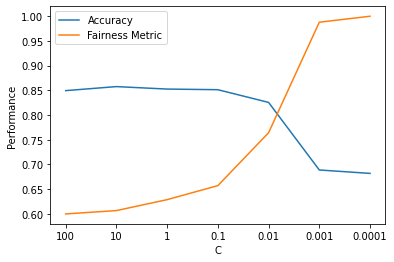

In [ ]:
cv = em.CrossValidator(em.LR, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results.mean_storage)
print(cv_results.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [ ]:
print(json.dumps(cv_results.mean_storage, indent=2))

{
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8494450030559334,
      "CV absolute": 0.5998864938018498
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8575994164152915,
      "CV absolute": 0.606615147506357
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8525876855740226,
      "CV absolute": 0.6287759840035256
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.851323909228919,
      "CV absolute": 0.6571533328739114
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.8255988643757024,
      "CV absolute": 0.7641569696604839
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.6888113404704166,
      "CV absolute": 0.9879125295150281
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.6819108456063563,
      "CV absolute": 1.0
    }
  ]
}


In [ ]:
# Test the higest ACCURACY Model on the Test Set
# Highest Accuracy Model C = 10 Training Accuracy = 0.8575994164152915 Fairness Metric = 0.606615147506357
# The equivalent of the above, but in just EthicML
learner = em.LR(C=10)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.8195488721804511
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.4007675438596491}}


In [ ]:
# Test the higest FAIRNESS on the Test Set
# Highest FAIRNESS Model C = 0.0001 Training Accuracy = 0.6819108456063563 Fairness Metric = 1.0
# The equivalent of the above, but in just EthicML
learner = em.LR(C=0.0001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.6340852130325815
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}


# TASK 2 (FAIRNESS MODEL)
###Using Reweighing

fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8307, CV absolute=0.643, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8213, CV absolute=0.6611, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8182, CV absolute=0.7428, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8213, CV absolute=0.7846, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.7774, CV absolute=0.8566, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.6583, CV absolute=1, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.6583, CV absolute=1, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8276, CV absolute=0.7228, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8276, CV absolute=0.7354, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8307, CV absolute=0.7665, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8276, CV absolute=0.762, completed!
fold: 1, model: 'Kamiran & Calders LR', Accu

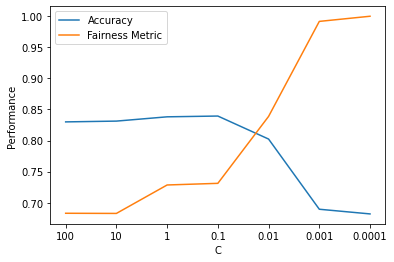

In [ ]:
# Task 2 reweighing
cv = em.CrossValidator(em.Kamiran, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results.mean_storage)
print(cv_results.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [ ]:
print(json.dumps(cv_results.mean_storage, indent=2))

{
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8299974369590505,
      "CV absolute": 0.6829633045331741
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8312612133041541,
      "CV absolute": 0.6827015081884652
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8381518503184086,
      "CV absolute": 0.728477182870888
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.8394057688137063,
      "CV absolute": 0.7311142185515005
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.8023757418031979,
      "CV absolute": 0.838807068694205
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.6894363281481043,
      "CV absolute": 0.9917068148664414
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.6819108456063563,
      "CV absolute": 1.0
    }
  ]
}


In [ ]:
# Test the higest ACCURACY Model on the Test Set
# Highest Accuracy Model C = 0.1 Training Accuracy = 0.8394057688137063 Fairness Metric = 0.7311142185515005
# The equivalent of the above, but in just EthicML
learner = em.Kamiran(C=0.1)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.8170426065162907
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.1529605263157895}}


In [ ]:
# Test the higest FAIRNESS on the Test Set
# Highest FAIRNESS Model C = 0.0001 Training Accuracy = 0.6819108456063563 Fairness Metric = 1.0
# The equivalent of the above, but in just EthicML
learner = em.Kamiran(C=0.0001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.6340852130325815
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}


# Task 3 (Extra): Model Selection Strategy
### Using my custom Accuracy-Fairness Metric Score

### Formular:


*   (Accuracy * Abs(Fairness)) * 100
or
*   (Accuracy * Abs(1-Equal opportunity difference)) * 100

In [ ]:
# loading the 5 fold cross validation results of the STANDARD Model

standard_model_result = {
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8494450030559334,
      "CV absolute": 0.5998864938018498
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8575994164152915,
      "CV absolute": 0.606615147506357
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8525876855740226,
      "CV absolute": 0.6287759840035256
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.851323909228919,
      "CV absolute": 0.6571533328739114
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.8255988643757024,
      "CV absolute": 0.7641569696604839
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.6888113404704166,
      "CV absolute": 0.9879125295150281
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.6819108456063563,
      "CV absolute": 1.0
    }
  ]
}

In [ ]:
# loading the 5 fold cross validation results of the FAIRNESS-BASED Model

fairness_model_results = {
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8299974369590505,
      "CV absolute": 0.6829633045331741
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8312612133041541,
      "CV absolute": 0.6827015081884652
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8381518503184086,
      "CV absolute": 0.728477182870888
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.8394057688137063,
      "CV absolute": 0.7311142185515005
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.8023757418031979,
      "CV absolute": 0.838807068694205
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.6894363281481043,
      "CV absolute": 0.9917068148664414
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.6819108456063563,
      "CV absolute": 1.0
    }
  ]
}

In [ ]:
print("ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL")
for c in C_arr:
 print(
     standard_model_result["C="+str(c)][0],
     (standard_model_result["C="+str(c)][2]['Accuracy'] * standard_model_result["C="+str(c)][2]['CV absolute'] * 100),
     )

ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL
{'C': 100} 50.957058456072545
{'C': 10} 52.02327964901278
{'C': 1} 53.60866609460946
{'C': 0.1} 55.945034430503135
{'C': 0.01} 63.08871263564736
{'C': 0.001} 68.04853537227665
{'C': 0.0001} 68.19108456063563


In [ ]:
print("ACCURACY-FAIRNESS CRITERIA SCORE FOR FAIRNESS-BASED MODEL")
for c in C_arr:
 print(
     fairness_model_results["C="+str(c)][0],
     fairness_model_results["C="+str(c)][2]['Accuracy'] * standard_model_result["C="+str(c)][2]['CV absolute'] * 100,
     )

ACCURACY-FAIRNESS CRITERIA SCORE FOR FAIRNESS-BASED MODEL
{'C': 100} 49.79042523218866
{'C': 10} 50.42556435248128
{'C': 1} 52.70097544283331
{'C': 0.1} 55.16182986095151
{'C': 0.01} 61.31410153854146
{'C': 0.001} 68.11027868803467
{'C': 0.0001} 68.19108456063563


In [ ]:
# FOR THE STANDARD MODEL 
print("TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC")
# Test the higest FAIRNESS on the Test Set
# Highest ACCURACY-FAIRNESS Model C = 0.0001 Score of 74.98600227015005
# The equivalent of the above, but in just EthicML
learner = em.LR(C=0.0001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {em.Accuracy().score(predictions, test)*(1-em.diff_per_sensitive_attribute(tpr_per_sens)['>0.06black_0->0.06black_1'])*100}")

TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC
Accuracy 0.6340852130325815
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}
TEST ACCURACY-FAIRNESS SCORE = 63.40852130325815


In [ ]:
# FOR THE FAIRNESS MODEL 
print("TEST SCORE FOR SELECTED FAIRNESS MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC")
# Test the higest FAIRNESS on the Test Set
# Highest ACCURACY-FAIRNESS Model C = 0.0001 Score of 74.98600227015005
# The equivalent of the above, but in just EthicML
learner = em.Kamiran(C=0.0001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {em.Accuracy().score(predictions, test)*(1-em.diff_per_sensitive_attribute(tpr_per_sens)['>0.06black_0->0.06black_1'])*100}")

TEST SCORE FOR SELECTED FAIRNESS MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC
Accuracy 0.6340852130325815
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}
TEST ACCURACY-FAIRNESS SCORE = 63.40852130325815
